# Lab Instructions

Choose your own adventure! In this lab, you will select a dataset, identify the target feature, and determine what relationships are present between the target and the other features in the data.

The dataset should have at least 5 features plus the target and at least a few hundred rows.  If the original dataset has more than 5 features, you may select the 5 that seem most interesting for this project. The subject can be anything you choose.  

For your lab submission, describe the dataset and the features - including all of the values of the features - and identify the target feature.  Then make visualizations to show the relationship of each feature to the target.  Which feature(s) seem most related?  Which features don't seem to influence the value of the target?  Draw at least one big picture conclusion about your data from the visualizations you've created.


# Lab 4.5 – Exploratory Data Analysis (EDA) and Preparing Data for ML

In this notebook, I will perform EDA on the **Used Car Listings** dataset.  
The main goal is to analyze car prices, identify key influencing features, visualize the data, and prepare it for machine learning.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional but nice visual helpers
import missingno as msno
from wordcloud import WordCloud

# For cleaner plots
plt.style.use('seaborn-v0_8')

ModuleNotFoundError: No module named 'missingno'

### Load the Dataset

In [5]:
file_path = r"C:\Users\MasterDanteDev86\Downloads\SIM3032-O Data Visualization and Modeling - Online\Data_Visualization_And_Modeling-main\Lecture\Week 4\assets\used_car_listings.csv"
df = pd.read_csv(file_path)

# Show first rows
df.head()

,listing_id,vin,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features
0,1,9M6LF68V634LY2252,Tesla,Model 3,2019,NaN,Coupe,Electric,Manual,46134,19919.0,good,"New Lindsey, GA, US",Dealer,"Alloy Wheels, Android Auto, Apple CarPlay, Fog..."
1,2,1S0ZCY536BSCY2864,Nissan,Rogue,2024,LT,Sedan,Hybrid,Automatic,16109,19480.0,good,"Pughtown, CO, US",Dealer,"Alloy Wheels, Android Auto, Lane Keep Assist, ..."
2,3,YFB625BN0RTMZ5590,Hyundai,i20,2018,XLE,Crossover,Petrol,Automatic,173239,4556.0,good,"Satna, HR, India",Dealer,"Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof"
3,4,CPMZ4RFN5WYL37096,Kia,Sportage,2023,EX,Hatchback,Diesel,CVT,36810,11536.0,fair,"山武市, Osaka, Japan",Certified Pre-Owned,"Alloy Wheels, Bluetooth, Keyless Entry, Naviga..."
4,5,4PJZG3MV6D9365673,Kia,Seltos,2020,Trend,Pickup,Diesel,Automatic,87749,14098.0,good,"長生郡長生村, Osaka, Japan",Certified Pre-Owned,"Apple CarPlay, Backup Camera, Bluetooth, Heate..."


### Dataset Overview
Checking basic info, missing values, and summary statistics.

In [8]:
df.info()
df.describe(include="all").transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing_id    2068 non-null   int64  
 1   vin           2068 non-null   object 
 2   make          2068 non-null   object 
 3   model         2068 non-null   object 
 4   year          2068 non-null   int64  
 5   trim          1824 non-null   object 
 6   body_type     2068 non-null   object 
 7   fuel_type     2068 non-null   object 
 8   transmission  2068 non-null   object 
 9   mileage       2068 non-null   int64  
 10  price         2068 non-null   float64
 11  condition     2022 non-null   object 
 12  location      2068 non-null   object 
 13  seller_type   2068 non-null   object 
 14  features      1917 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 242.5+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
listing_id,2068.0,NaN,NaN,NaN,1034.5,597.124498,1.0,517.75,1034.5,1551.25,2068.0
vin,2068,2068,9M6LF68V634LY2252,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
make,2068,16,Ford,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,2068,65,Model 3,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,2068.0,NaN,NaN,NaN,2016.975822,4.610981,2005.0,2014.0,2017.0,2020.0,2025.0
trim,1824,19,Touring,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_type,2068,9,Crossover,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,2068,6,Petrol,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,2068,5,Automatic,1109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,2068.0,NaN,NaN,NaN,115626.364603,80971.112603,0.0,57683.25,99212.0,159291.5,418428.0


### Missing Data
Visualizing and counting missing values.

In [42]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Optional visualization
try:
    msno.bar(df)
    plt.show()
except:
    print("Missingno is not installed, skipping visualization.")

Missing values per column:
listing_id        0
vin               0
make              0
model             0
year              0
trim            244
body_type         0
fuel_type         0
transmission      0
mileage           0
price             0
condition        46
location          0
seller_type       0
features        151
dtype: int64
Missingno is not installed, skipping visualization.


### Price Distribution
Visualizing price distribution before filtering outliers.

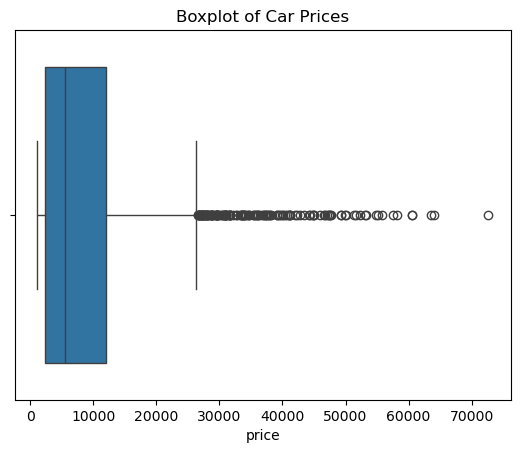

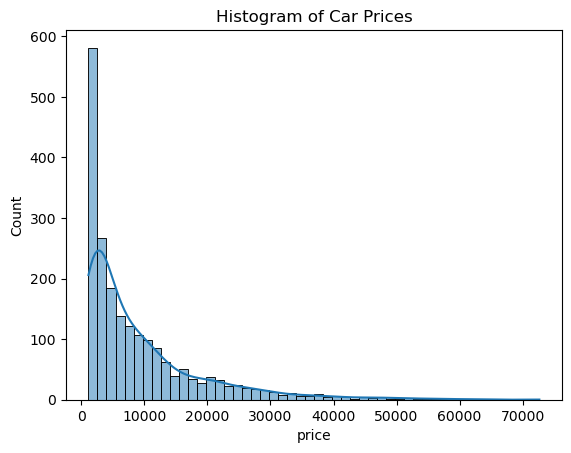

In [14]:
sns.boxplot(x=df['price'])
plt.title("Boxplot of Car Prices")
plt.show()

sns.histplot(df['price'], bins=50, kde=True)
plt.title("Histogram of Car Prices")
plt.show()

### Filtering Outliers
Car prices can have extreme values.  
Here, I remove prices below $500 and above $100,000 for cleaner analysis.

In [19]:
df = df[(df['price'] >= 500) & (df['price'] <= 100000)]

### Categorical Features
Exploring categorical features like Make, Fuel Type, Transmission.

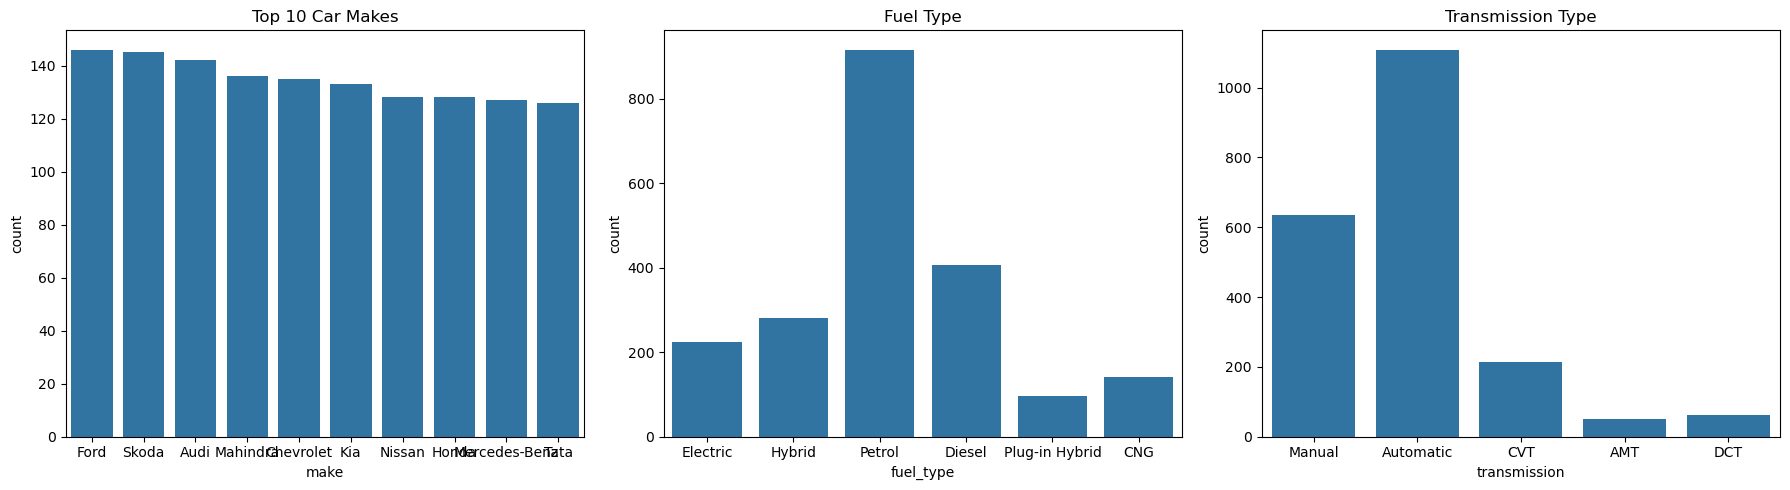

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='make', data=df, order=df['make'].value_counts().index[:10], ax=axes[0])
axes[0].set_title("Top 10 Car Makes")

sns.countplot(x='fuel_type', data=df, ax=axes[1])
axes[1].set_title("Fuel Type")

sns.countplot(x='transmission', data=df, ax=axes[2])
axes[2].set_title("Transmission Type")

plt.tight_layout()
plt.show()

### Numerical Features
Exploring year, mileage, and other numerical features.

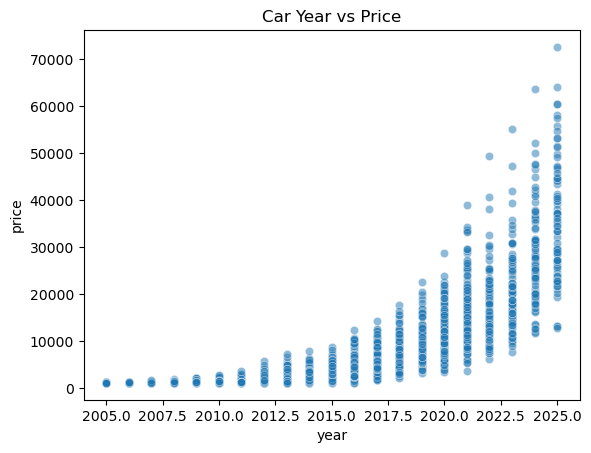

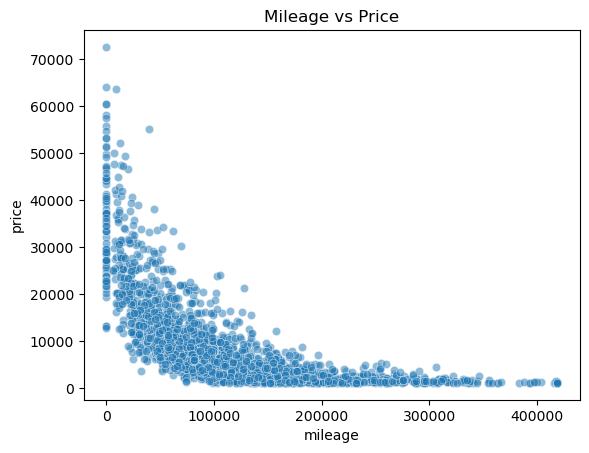

In [25]:
sns.scatterplot(x='year', y='price', data=df, alpha=0.5)
plt.title("Car Year vs Price")
plt.show()

sns.scatterplot(x='mileage', y='price', data=df, alpha=0.5)
plt.title("Mileage vs Price")
plt.show()

### Feature Relationships
Checking which features influence price most.

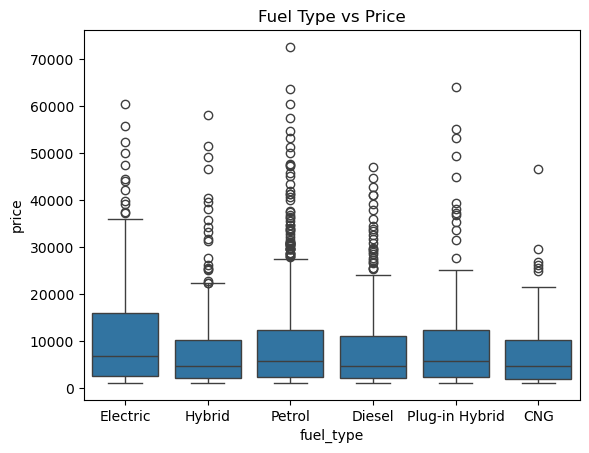

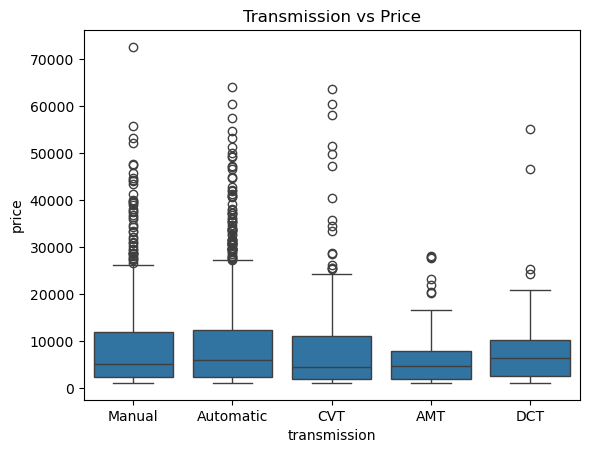

In [28]:
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title("Fuel Type vs Price")
plt.show()

sns.boxplot(x='transmission', y='price', data=df)
plt.title("Transmission vs Price")
plt.show()

### Correlation Heatmap
Checking numerical relationships with price.

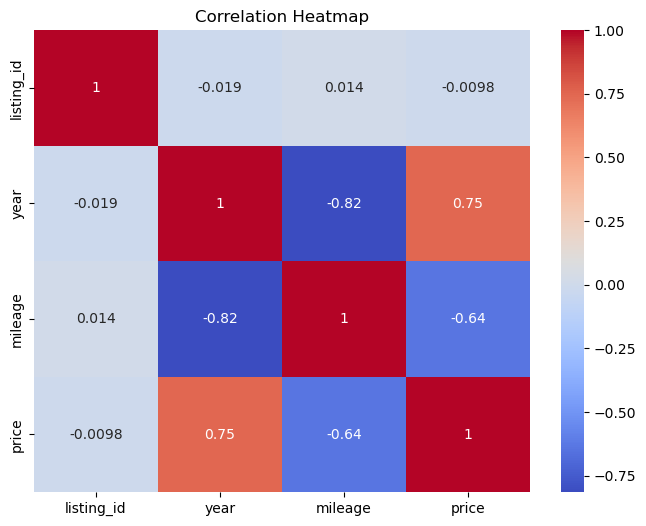

In [31]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### WordCloud of Car Descriptions

In [44]:
# Create a WordCloud of car models
try:
    text = " ".join(str(desc) for desc in df['model'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
except:
    print("WordCloud not available. Install 'wordcloud' to use this feature.")

WordCloud not available. Install 'wordcloud' to use this feature.


# Conclusion

- Car prices are strongly influenced by **year** (newer = more expensive).  
- **Mileage** is negatively correlated with price (higher mileage = lower price).  
- **Fuel type** and **transmission** also influence price (e.g., electric cars often cost more).  
- Most cars are in the range $2,000 – $30,000.  
- This analysis prepares the dataset for modeling by removing outliers and understanding key feature relationships.  